In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
data = pd.read_csv("forbes_2023_billionaires.csv")
data.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,countryOfCitizenship,organization,selfMade,gender,birthDate,title,philanthropyScore,numberOfSiblings,bio,about
0,1,Bernard Arnault & family,74.0,211000.0,2023,4,Fashion & Retail,LVMH,France,NaN,...,France,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05 00:00:00,Chairman and CEO,NaN,NaN,Bernard Arnault oversees the LVMH empire of 75...,"Arnault apparently wooed his wife, Helene Merc..."
1,2,Elon Musk,51.0,180000.0,2023,4,Automotive,"Tesla, SpaceX",United States,Texas,...,United States,Tesla,True,M,1971-06-28 00:00:00,CEO,1.0,NaN,"Elon Musk cofounded six companies, including e...","Musk, who says he's worried about population c..."
2,3,Jeff Bezos,59.0,114000.0,2023,4,Technology,Amazon,United States,Washington,...,United States,Amazon,True,M,1964-01-12 00:00:00,Chairman and Founder,2.0,NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Bezos worked summers on his grandf..."
3,4,Larry Ellison,78.0,107000.0,2023,4,Technology,Oracle,United States,Hawaii,...,United States,Oracle,True,M,1944-08-17 00:00:00,CTO and Founder,1.0,NaN,"Larry Ellison is chairman, chief technology of...",Ellison never finished college. He started out...
4,5,Warren Buffett,92.0,106000.0,2023,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,United States,Berkshire Hathaway Inc. (Cl A),True,M,1930-08-30 00:00:00,CEO,5.0,NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [3]:
data.shape

(2640, 21)

This dataset has the information of 2640 billionaires on 21 different features.

In [4]:
# lets check the features/columns
data.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'numberOfSiblings', 'bio', 'about'],
      dtype='object')

For this specific analysis we will not need all the columns of this dataset. So I will remove some of the columns. 

In [5]:
columns_to_delete = ['year', 'month', 'state', 'city', 'countryOfCitizenship', 'organization', 'birthDate','philanthropyScore', 'numberOfSiblings', 'bio', 'about', 'title']

data.drop(columns=columns_to_delete, inplace=True)
data.head(5)

,rank,personName,age,finalWorth,category,source,country,selfMade,gender
0,1,Bernard Arnault & family,74.0,211000.0,Fashion & Retail,LVMH,France,False,M
1,2,Elon Musk,51.0,180000.0,Automotive,"Tesla, SpaceX",United States,True,M
2,3,Jeff Bezos,59.0,114000.0,Technology,Amazon,United States,True,M
3,4,Larry Ellison,78.0,107000.0,Technology,Oracle,United States,True,M
4,5,Warren Buffett,92.0,106000.0,Finance & Investments,Berkshire Hathaway,United States,True,M


In [6]:
# let's check the data dimenssion again
data.shape

(2640, 9)

In [7]:
#check all the features are in their appropriate data type or not.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        2640 non-null   int64  
 1   personName  2640 non-null   object 
 2   age         2576 non-null   float64
 3   finalWorth  2640 non-null   float64
 4   category    2640 non-null   object 
 5   source      2640 non-null   object 
 6   country     2602 non-null   object 
 7   selfMade    2640 non-null   bool   
 8   gender      2640 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 167.7+ KB


Before we go ahead, let’s see whether or not this dataset contains missing values:

In [8]:
data.isnull().sum()

rank           0
personName     0
age           64
finalWorth     0
category       0
source         0
country       38
selfMade       0
gender         0
dtype: int64

In [32]:
# let's check the data dimenssion again
data = data.dropna()
data.shape

(2550, 9)

After removing all the null values we have the informations of 2550 billionaires.

#### Now let’s have a look at the top 10 billionaires according to their Final Worth:

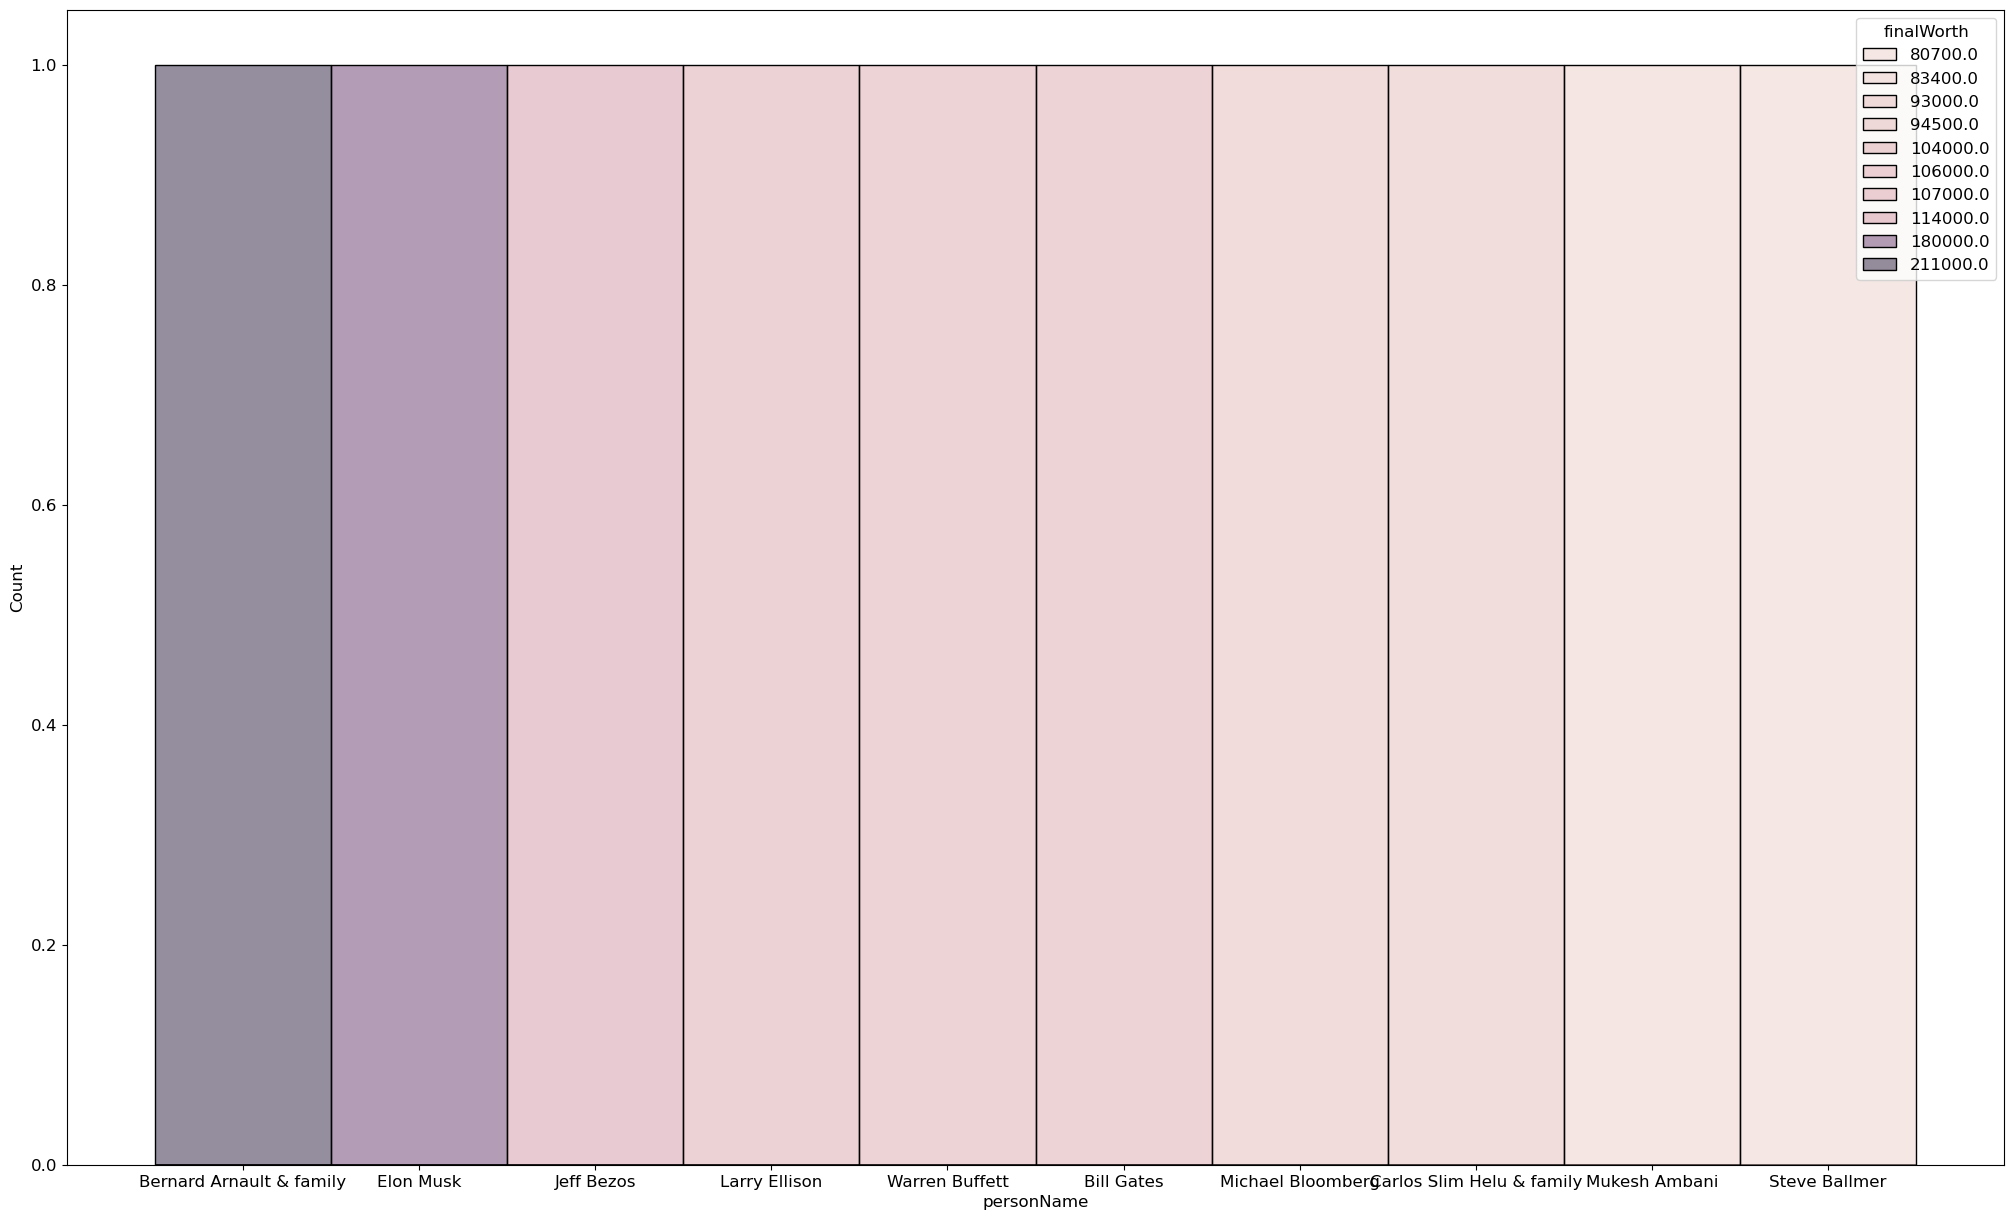

In [33]:
df = data.sort_values(by = ["finalWorth"], ascending=False).head(10)
plt.figure(figsize=(25, 15))
sns.histplot(x="personName", hue="finalWorth", data=df)
plt.show()

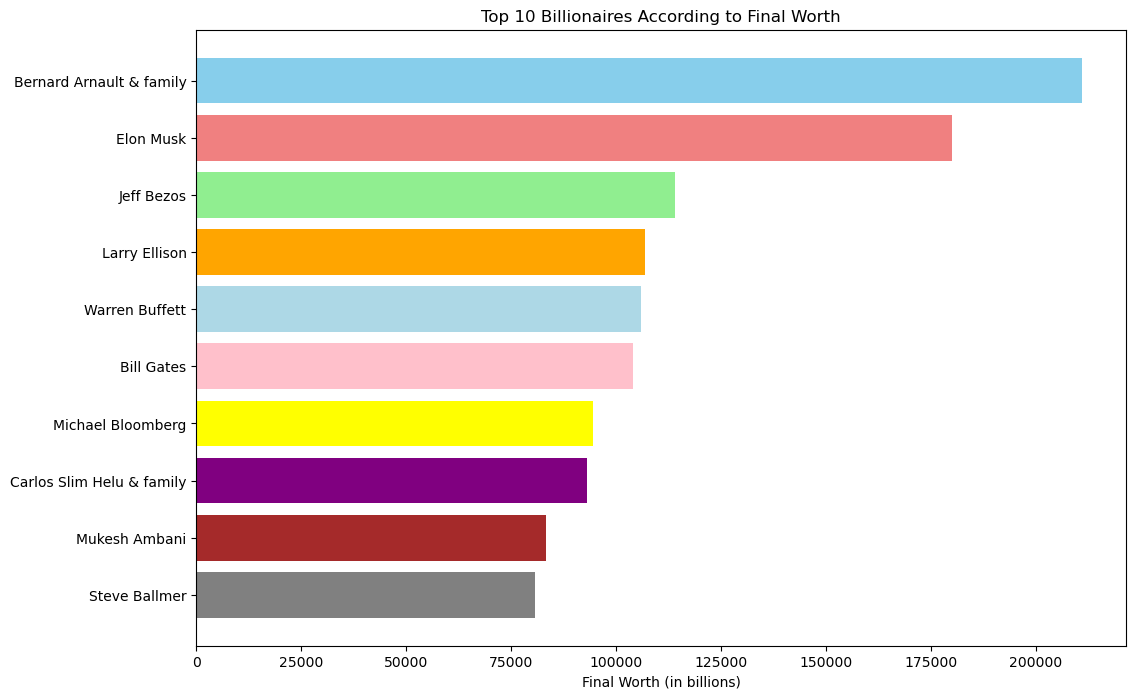

In [11]:
top_10_billionaires = data.nlargest(10, 'finalWorth')

# Define custom colors for each person
custom_colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue', 'pink', 'yellow', 'purple', 'brown', 'gray']

plt.figure(figsize=(12, 8))
plt.barh(top_10_billionaires['personName'], top_10_billionaires['finalWorth'], color=custom_colors)
plt.xlabel('Final Worth (in billions)')
plt.title('Top 10 Billionaires According to Final Worth')
plt.gca().invert_yaxis()  # To have the highest net worth at the top
plt.show()

#### Now let’s have a look at the top 5 domains with the most number of billionaires:

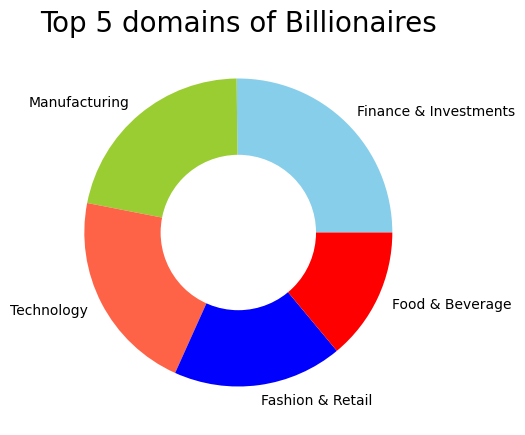

In [12]:
a = data["category"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 domains of Billionaires", fontsize=20)
plt.show()

So we can say that billionaires usually involed in Finance and Investment, Food and Beverage, Fashion and Retail, Technology and Manufacturing industries

#### Now let’s have a look at the top 5 sources of incomes with the most number of billionaires:

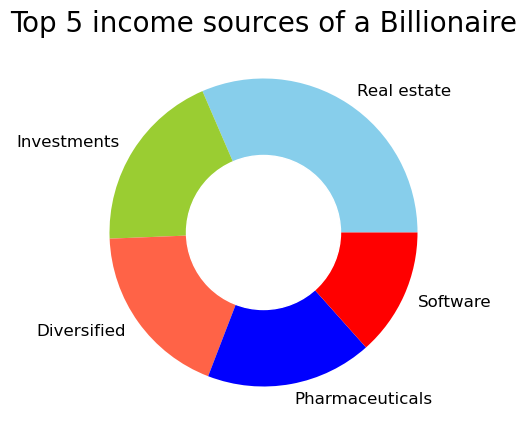

In [13]:
a = data["source"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 income sources of a Billionaire", fontsize=20)
plt.show()

#### Now let’s have a look at the top 5 countries with the most number of billionaires:

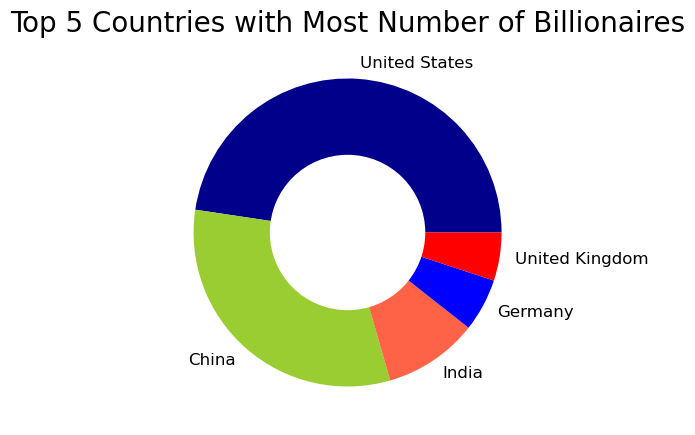

In [20]:
a = data["country"].value_counts().head()
index = a.index
Countries = a.values
custom_colors = ["darkblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(Countries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Countries with Most Number of Billionaires", fontsize=20)
plt.show()

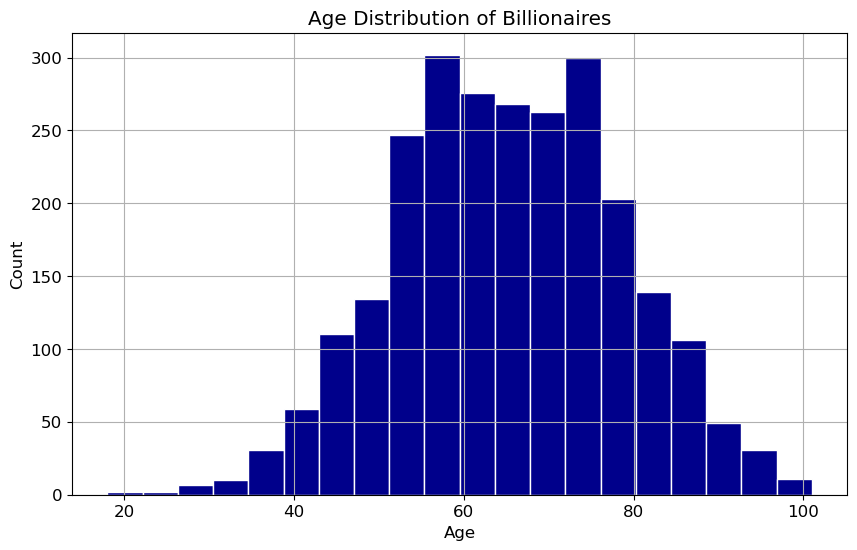

In [21]:
age_data = data['age']
# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=20, color='darkblue', edgecolor='white')  # Adjust the number of bins as needed
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

From the above age distribution we can say that there are very few billionaires under the age of 30 and above 90. Typically billionaires are 50 - 70 years old

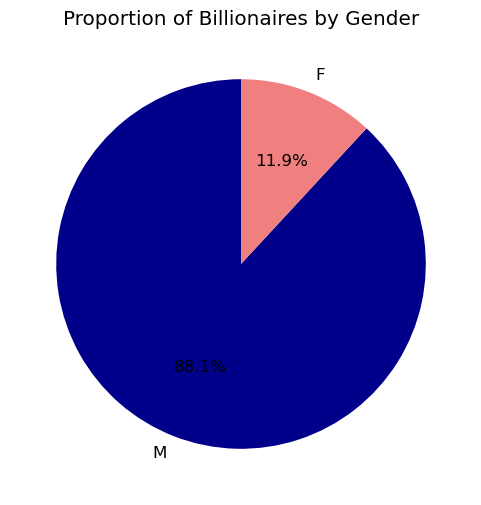

In [41]:
gender_counts = data['gender'].value_counts()

custom_colors = ['darkblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=custom_colors, startangle=90)
plt.title('Proportion of Billionaires by Gender')
plt.show()

 Here we can see that most of the billionaires are male. Almost 88% are male in compare to 12% of females.

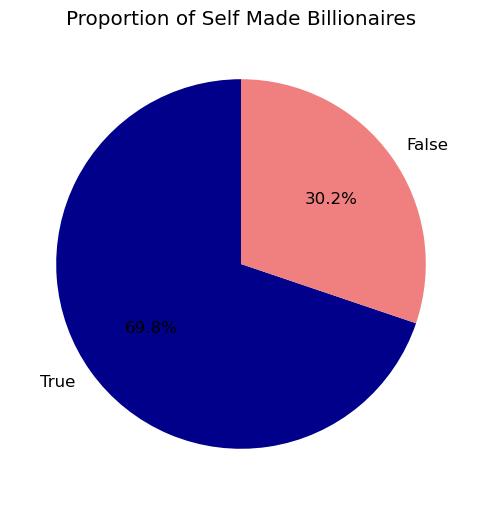

In [42]:
gender_counts = data['selfMade'].value_counts()

custom_colors = ['darkblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=custom_colors, startangle=90)
plt.title('Proportion of Self Made Billionaires')
plt.show()

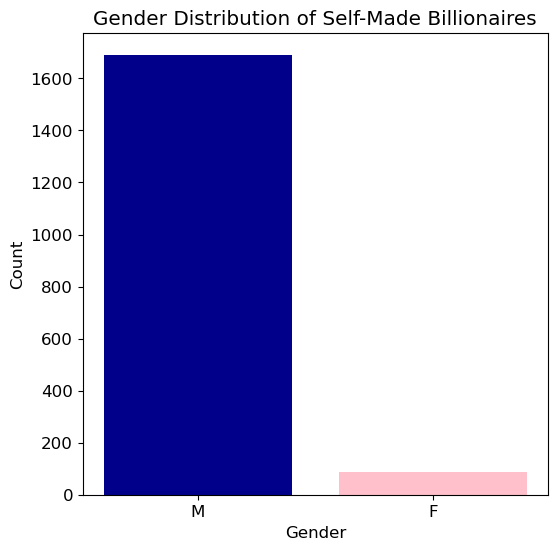

In [38]:
self_made_gender_distribution = data[data['selfMade']]['gender'].value_counts()

custom_colors = {'M': 'darkblue', 'F': 'pink'}

plt.figure(figsize=(6, 6))
plt.bar(self_made_gender_distribution.index, self_made_gender_distribution, color=[custom_colors[g] for g in self_made_gender_distribution.index])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Self-Made Billionaires')
plt.show()

We can see that most of the self made billionaires are male.